### Importing libraries

In [19]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import statsmodels.stats.api as sms

In [36]:
import warnings
warnings.filterwarnings('ignore')

### load Data

In [37]:
data_frame = pd.read_csv("../Data/AdSmartABdata.csv")

In [38]:
data_frame.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [39]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### cleaning the Data

Below We will clean the 6 variables because our target variable is Experiment variable.

In [40]:
clean_Ad_data = data_frame.drop(['auction_id', 'date', 'hour', 'device_make', 'platform_os', 'browser'], axis=1)

from experiment column we will filter users that has not respond either to the exposed or Control group

In [41]:
clean_Ad_data = clean_Ad_data[(clean_Ad_data['yes'] != 0) | clean_Ad_data['no'] != 0]
clean_Ad_data['aware'] = 0
clean_Ad_data.loc[clean_Ad_data['yes'] == 1, 'aware'] = 1
clean_Ad_data.loc[clean_Ad_data['yes'] == 0, 'aware'] = 0

clean_Ad_data

,experiment,yes,no,aware
2,exposed,0,1,0
16,exposed,1,0,1
20,exposed,0,1,0
23,control,1,0,1
27,control,0,1,0
...,...,...,...,...
8059,exposed,1,0,1
8063,exposed,1,0,1
8064,control,0,1,0
8069,control,0,1,0


In [42]:
ad_summary = clean_Ad_data.pivot_table(values='aware', index='experiment', aggfunc=np.sum)

ad_summary['total'] = clean_Ad_data.pivot_table(values='aware', index='experiment', aggfunc=lambda x: len(x))
ad_summary['not aware'] = ad_summary['total'] - ad_summary['aware']
ad_summary['rate'] = clean_Ad_data.pivot_table(values='aware', index='experiment')
ad_summary = ad_summary.reindex(['aware', 'not aware', 'total', 'rate'], axis=1)
ad_summary

,aware,not aware,total,rate
experiment,,,,
control,264,322,586,0.450512
exposed,308,349,657,0.468798


It looks like the difference in conversion rates between the two groups is 1.8%.

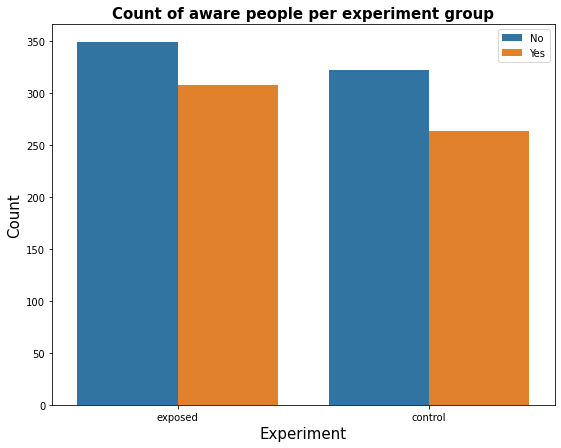

In [43]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x ='experiment', hue='yes', data = clean_Ad_data) 

ax.set_xlabel('Experiment', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Count of aware people per experiment group', fontsize=15, fontweight='bold')
plt.legend( ['No', 'Yes'])

Text(0.5, 1.0, 'Count of Browsers used')

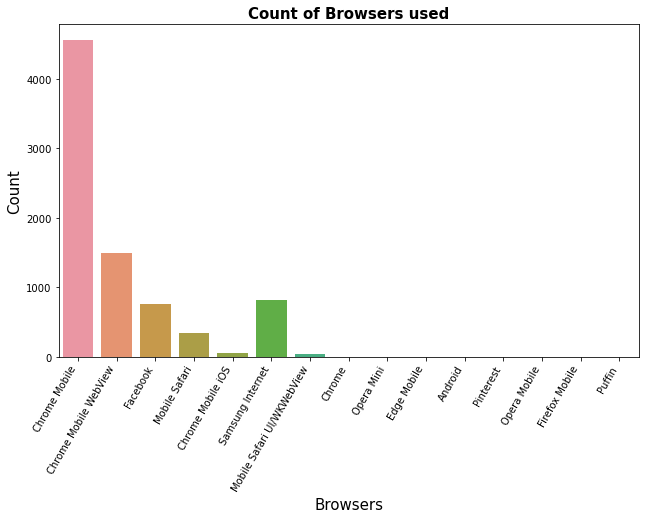

In [44]:
plt.figure(figsize=(9,7))
ax= sns.countplot(x ='browser', data = data_frame) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browsers', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Count of Browsers used', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Hour')

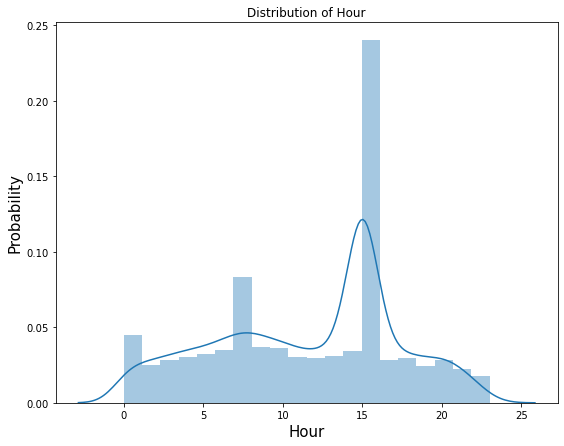

In [45]:
plt.figure(figsize=(9,7))
#top_5_device= data_frame['device_make'].value_counts().nlargest(5)
ax=sns.distplot(data_frame['hour'],bins=20) 
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Probability' , fontsize=15)
plt.title('Distribution of Hour')


